In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ai-projects/forecast-studio

/content/drive/MyDrive/ai-projects/forecast-studio


In [6]:
import pandas as pd

lgb = pd.read_csv('reports/backtest_rolling_windows_lgb.csv')
cat = pd.read_csv('reports/backtest_rolling_windows_cb.csv')


merged = lgb.merge(
    cat[['cutoff', 'mae', 'rmse', 'mae_naive7']],
    on='cutoff',
    suffixes=('_lgb', '_cat'),
)

merged['delta_mae_cat_vs_lgb'] = merged['mae_lgb'] - merged['mae_cat']
merged[['cutoff', 'mae_lgb', 'mae_cat', 'mae_naive7_lgb', 'mae_naive7_cat', 'delta_mae_cat_vs_lgb']]


,cutoff,mae_lgb,mae_cat,mae_naive7_lgb,mae_naive7_cat,delta_mae_cat_vs_lgb
0,2015-01-01,3.958175,3.951927,6.541857,6.541857,0.006247
1,2015-04-01,4.849940,4.818011,8.686500,8.686500,0.031929
2,2015-07-01,5.382212,5.338002,8.987929,8.987929,0.044211
3,2015-10-01,4.711801,4.687051,8.090071,8.090071,0.024750
4,2016-01-01,4.081154,4.101546,6.761500,6.761500,-0.020391
5,2016-04-01,5.058343,4.978377,9.107500,9.107500,0.079966
6,2016-07-01,5.595021,5.560699,9.551071,9.551071,0.034321
7,2016-10-01,4.915961,4.865646,8.427929,8.427929,0.050315


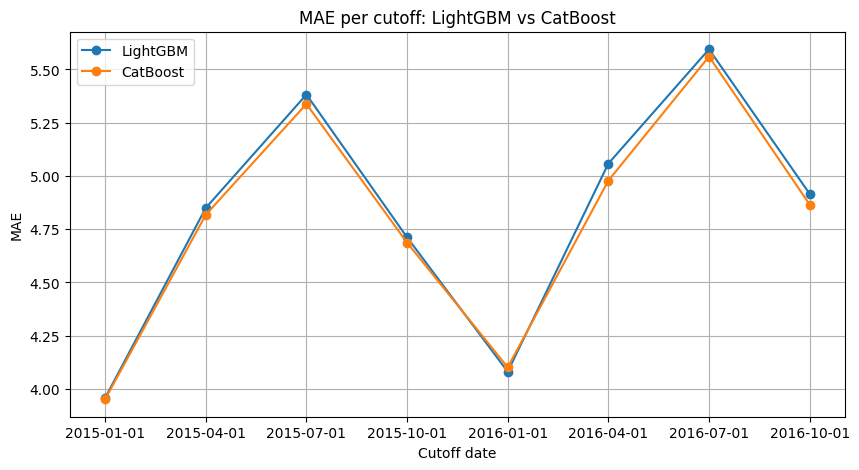

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(merged['cutoff'], merged['mae_lgb'], marker='o', label='LightGBM')
plt.plot(merged['cutoff'], merged['mae_cat'], marker='o', label='CatBoost')
plt.title('MAE per cutoff: LightGBM vs CatBoost')
plt.xlabel('Cutoff date')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()